In [1]:
# pip install wordcloud

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Core packages for text processing.

import string
import re

# Libraries for text preprocessing.

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Loading some sklearn packaces for modelling.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score

# Some packages for word clouds and NER.

from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from PIL import Image
import spacy
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.5/en_core_web_sm-2.2.5.tar.gz
import en_core_web_sm

# Core packages for general use throughout the notebook.

import random
import warnings
import time
import datetime

# For customizing our plots.

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
# Loading pytorch packages.

import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


ModuleNotFoundError: No module named 'wordcloud'

# EXPLORING Fake_data

In [320]:
fake_data= pd.read_csv ("data/Fake.csv")  

In [321]:
fake_data.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [322]:
fake_data.shape

(23481, 4)

In [323]:
# imprime des infos sur le datafrme comme le type d'index, les colonnes, les valeurs non-null et la mémoire
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [324]:
fake_data.describe

<bound method NDFrame.describe of                                                    title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was r

In [325]:
# traitement des Valeur manquante, 0 valeur manquante 
fake_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [326]:
fake_data.duplicated().sum()

3

In [327]:
fake_data.isnull().values.any()

False

In [328]:
# nous compte le type de valeur (float, object)
fake_data.dtypes.value_counts()

object    4
dtype: int64

In [329]:
fake_data['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [330]:
fake_data['title'].value_counts()

MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead                                                                  6
ELEMENTARY SCHOOL PLANS ‘BLACKS ONLY’ FIELD TRIP TO COLLEGE FOR THIRD GRADERS                                                                                          4
FORMER FBI ASST DIRECTOR: “Jim Comey ‘Danced With The Devil’…I’m Glad He’s Gone” [VIDEO]                                                                               4
AN INSIDE LOOK AT OBAMA’S 5-STAR SUMMER VACATION RETREAT: Meanwhile…62% Of Americans Won’t Be Taking A Vacation This Summer                                            3
GARY JOHNSON: Meet The “Creepy” Pro-Amnesty, Anti-Gun, Pro-TPP, Pro-Abortion, Democrat Party Operative And His Anti-Gun Rights, Friend Of Clinton’s VP Pick [VIDEO]    3
                                                                                                                                                           

In [331]:
fake_data['text'].value_counts()

In [332]:
fake_data.dropna(inplace=True)

In [333]:
fake_data['title']

0         Donald Trump Sends Out Embarrassing New Year’...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obama’s Name...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
23476    McPain: John McCain Furious That Iran Treated ...
23477    JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478    Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479    How to Blow $700 Million: Al Jazeera America F...
23480    10 U.S. Navy Sailors Held by Iranian Military ...
Name: title, Length: 23481, dtype: object

In [334]:
#Counting by Subjects 
for key,count in fake_data.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{fake_data.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


# DATA-VISUALISATION Fake_data

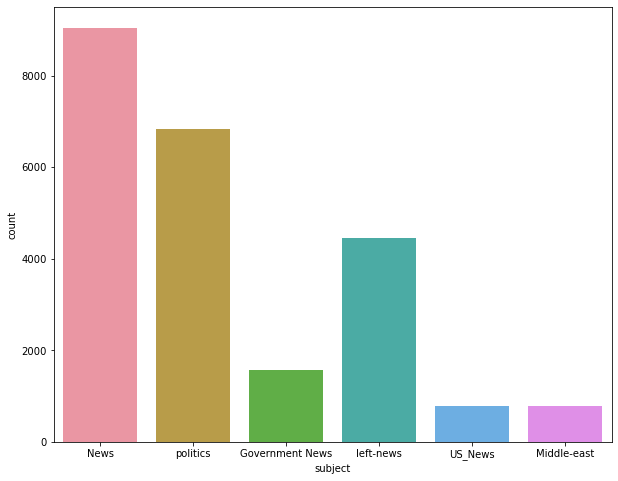

In [335]:
plt.figure(figsize=(10,8))
sns.countplot(x="subject", data=fake_data)
plt.show()

# DATA BALANCING IN PERCENT

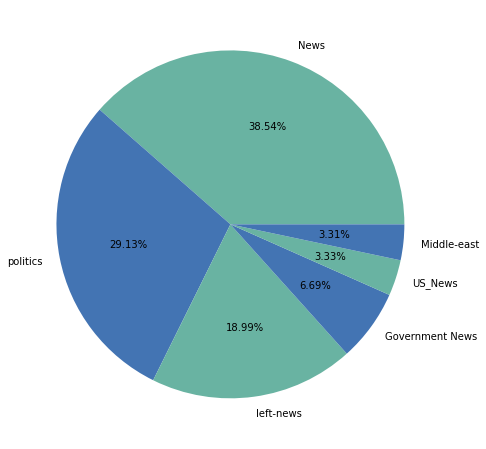

In [336]:
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

fake_data_value = fake_data['subject'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(fake_data_value,autopct='%1.2f%%',labels=fake_data_value.index)
plt.show()

# WORD CLOUD Fake_data

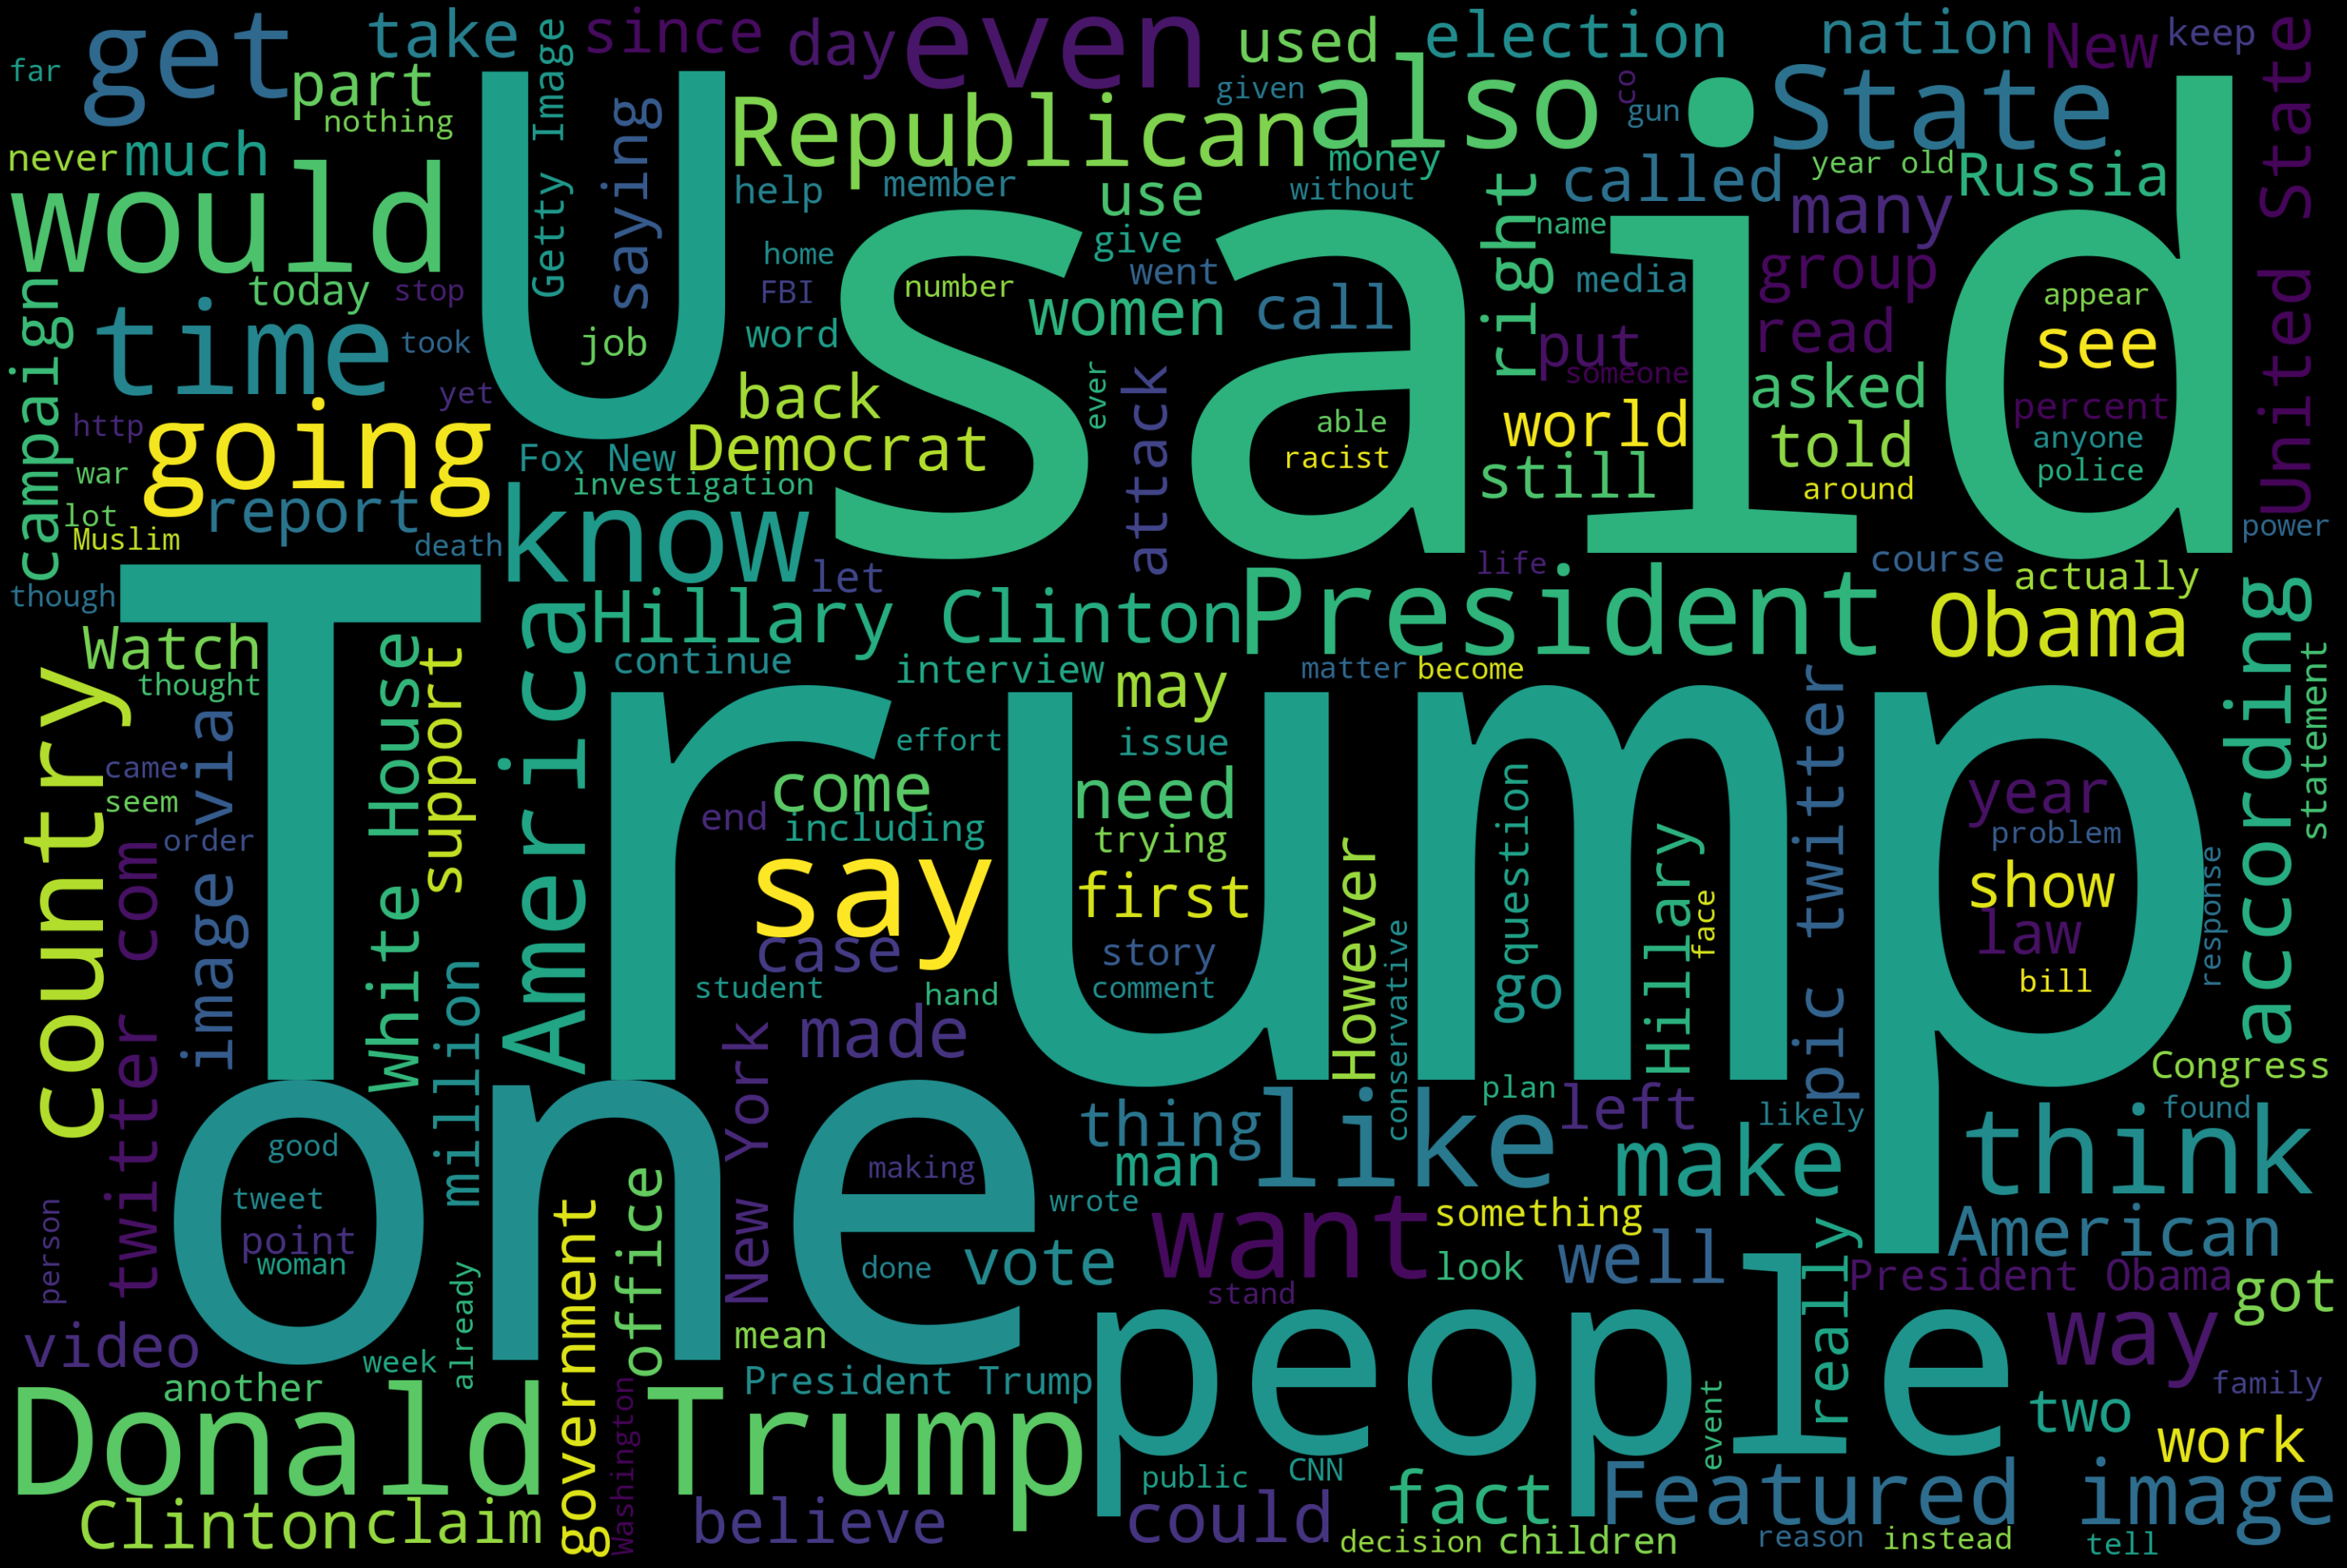

In [337]:
#Word Cloud
text = ''
for news in fake_data.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

# EXPLORING TRUE_DATA

In [338]:
true_data= pd.read_csv("data/True.csv")

In [339]:
true_data

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [340]:
true_data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [341]:
true_data.shape

(21417, 4)

In [342]:
# imprime des infos sur le datafrme comme le type d'index, les colonnes, les valeurs non-null et la mémoire
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [343]:
true_data.describe

<bound method NDFrame.describe of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reut

In [344]:
# traitement des Valeur manquante, 0 valeur manquante 
true_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [345]:
true_data.duplicated().sum()

206

In [346]:
true_data.isnull().values.any()

False

In [347]:
true_data['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [348]:
true_data['title'].value_counts()

Factbox: Trump fills top jobs for his administration                                14
Factbox: Contenders for senior jobs in Trump's administration                        8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday     8
Factbox: International reaction to arrest of Reuters reporters in Myanmar            6
Highlights: The Trump presidency on April 21 at 6:12 p.m. EDT/2212 GMT               5
                                                                                    ..
Obama, on last trip to Europe, warns against nationalism, populism                   1
A post-Trump SEC could shake up current policy                                       1
U.S. panel urges probe on whether China weakening U.S. militarily                    1
Trump team weighs 'infrastructure bank' to fund projects: Trump adviser              1
Indonesia to buy $1.14 billion worth of Russian jets                                 1
Name: title, Length: 20826, dtype: int64

In [349]:
true_data['text'].value_counts()

(Reuters) - Highlights for U.S. President Donald Trump’s administration on Thursday: The United States drops a massive GBU-43 bomb, the largest non-nuclear bomb it has ever used in combat, in Afghanistan against a series of caves used by Islamic State militants, the Pentagon says. Trump says Pyongyang is a problem that “will be taken care of” amid speculation that North Korea is on the verge of a sixth nuclear test. Military force cannot resolve tension over North Korea, China warns, while an influential Chinese newspaper urges Pyongyang to halt its nuclear program in exchange for Beijing’s protection. The Trump administration is focusing its North Korea strategy on tougher economic sanctions, possibly including intercepting cargo ships and punishing Chinese banks doing business with Pyongyang, U.S. officials say. Trump says “things will work out fine” between the United States and Russia, a day after declaring U.S.-Russian relations may be at an all-time low. Trump signals he could be

In [350]:
true_data['title']

0        As U.S. budget fight looms, Republicans flip t...
1        U.S. military to accept transgender recruits o...
2        Senior U.S. Republican senator: 'Let Mr. Muell...
3        FBI Russia probe helped by Australian diplomat...
4        Trump wants Postal Service to charge 'much mor...
                               ...                        
21412    'Fully committed' NATO backs new U.S. approach...
21413    LexisNexis withdrew two products from Chinese ...
21414    Minsk cultural hub becomes haven from authorities
21415    Vatican upbeat on possibility of Pope Francis ...
21416    Indonesia to buy $1.14 billion worth of Russia...
Name: title, Length: 21417, dtype: object

# DATA-VISUALISATION True_data

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



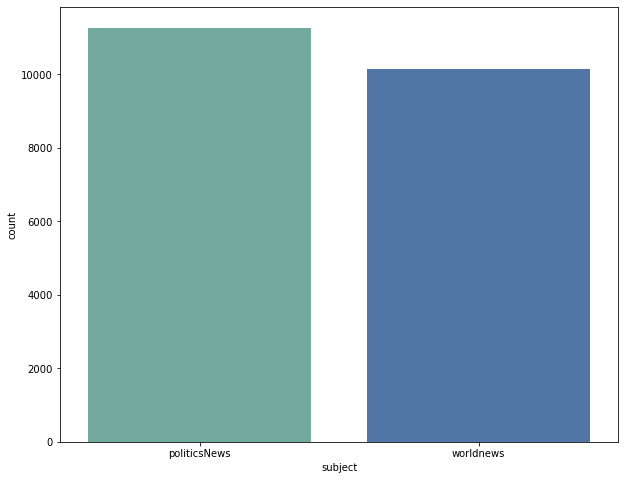

In [351]:
plt.figure(figsize=(10,8))
sns.countplot("subject", data=true_data)
plt.show()

# DATA BALANCING IN PERCENT

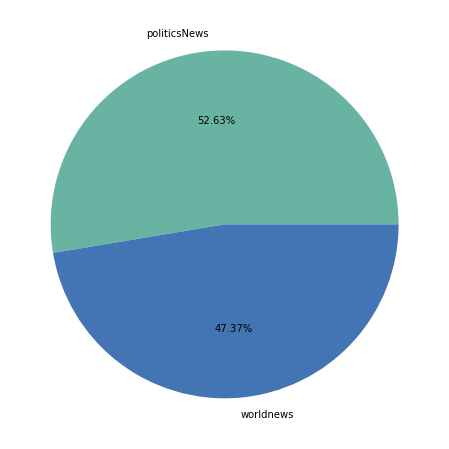

In [352]:
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

true_data_value = true_data['subject'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(true_data_value,autopct='%1.2f%%',labels=true_data_value.index)
plt.show()

# WORD CLOUD True_data

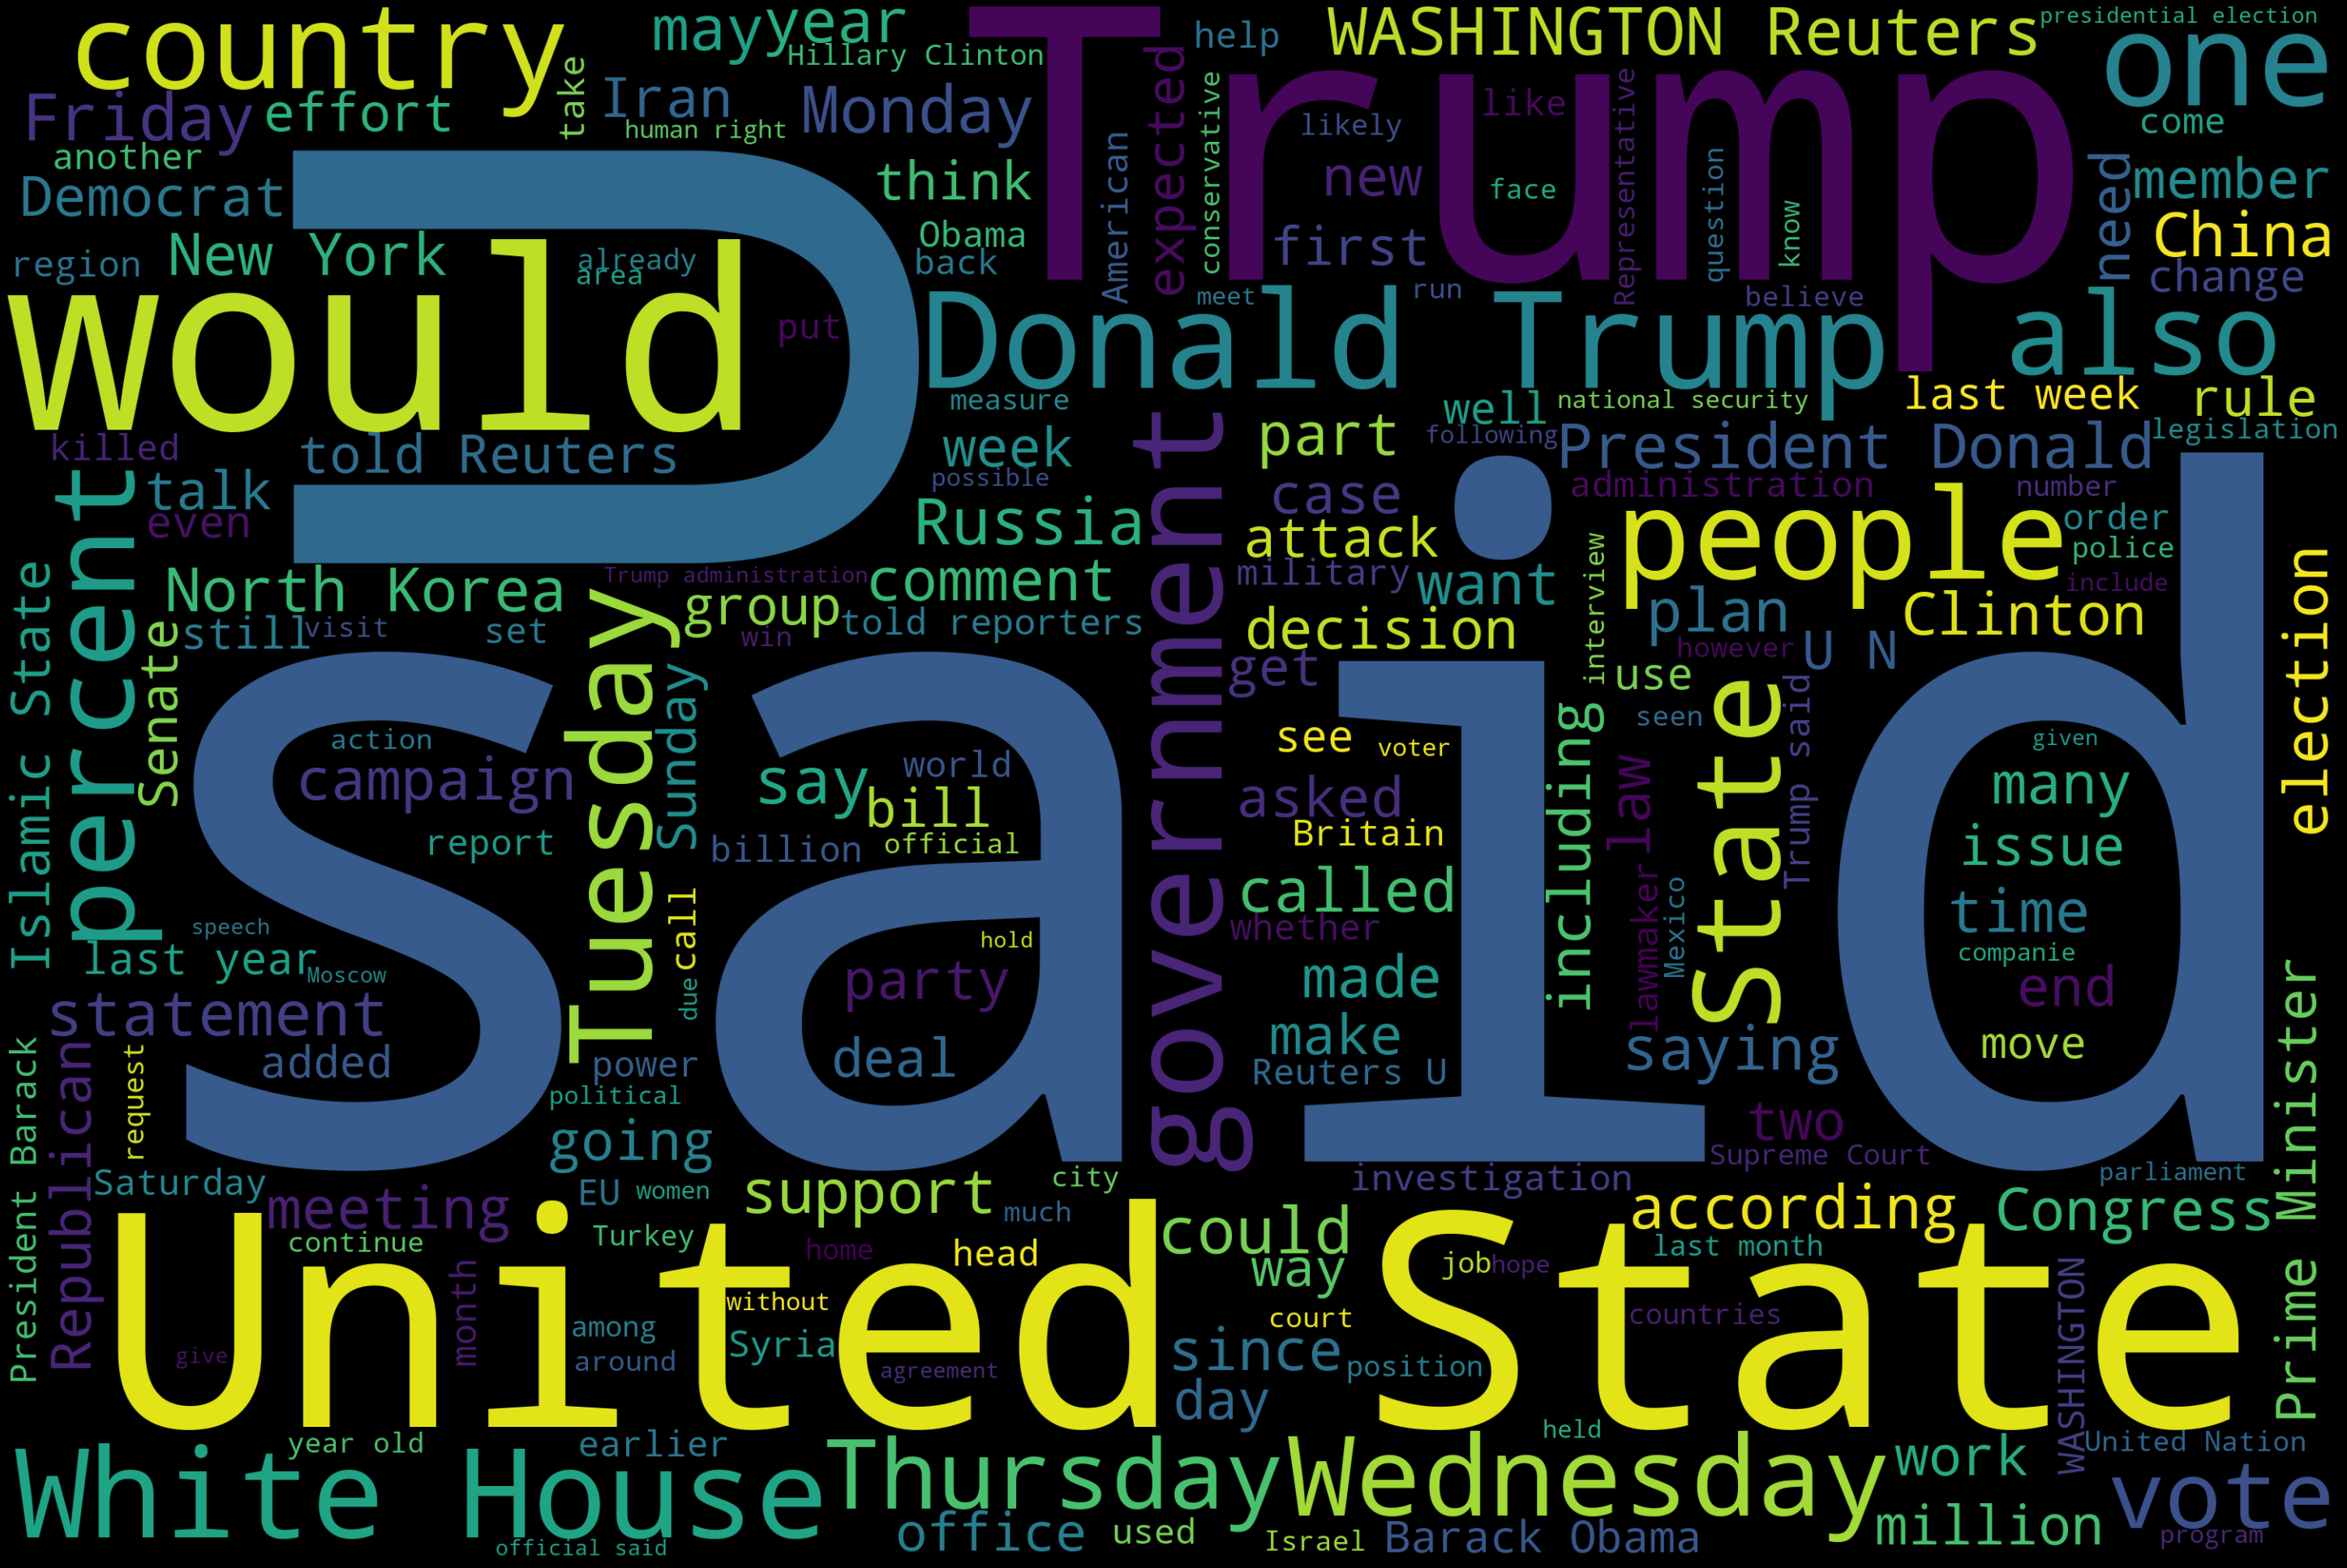

In [353]:
#WordCloud For Real News
text = ''
for news in true_data.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

# Cleaning Data

In [354]:
#First Creating list of index that do not have publication part
unknown_publishers = []
for index,row in enumerate(true_data.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        #if no text part is present, following will give error
        record[1]
        #if len of piblication part is greater than 260
        #following will give error, ensuring no text having "-" in between is counted
        assert(len(record[0]) < 260)
    except:
        unknown_publishers.append(index)

In [355]:
#Thus we have list of indices where publisher is not mentioned
#lets check
true_data.iloc[unknown_publishers].text
#true, they do not have text like "WASHINGTON (Reuters)"

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

# Text at index 8970 is empty
(Le texte à l'index 8970 est vide)

In [356]:
true_data.iloc[8970]
#empty
#will remove this soon

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [357]:
#Seperating Publication info, from actual text
publisher = []
tmp_text = []
for index,row in enumerate(true_data.text.values):
    if index in unknown_publishers:
        #Add unknown of publisher not mentioned
        tmp_text.append(row)
        
        publisher.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    publisher.append(record[0])
    tmp_text.append(record[1])

In [358]:
#Replace existing text column with new text
#add seperate column for publication info
true_data["publisher"] = publisher
true_data["text"] = tmp_text

del publisher, tmp_text, record, unknown_publishers

New column called "Publisher" has been added.

In [359]:
#checking for rows with empty text like row:8970
[index for index,text in enumerate(true_data.text.values) if str(text).strip() == '']
#seems only one :)

[8970]

In [360]:
#dropping this record
true_data = true_data.drop(8970, axis=0)

In [361]:
#Getting Total Rows
print(f"Total Records:\t{true_data.shape[0]}")

#Counting by Subjects 
for key,count in true_data.subject.value_counts().iteritems():
  print(f"{key}:\t{count}")

Total Records:	21416
politicsNews:	11271
worldnews:	10145


# Preprocessing Text

# Concat

In [362]:
# Adding class Information
true_data["fake"] = 0
fake_data["fake"] = 1

In [363]:
# Subject is diffrent for real and fake thus dropping it
# Aldo dropping Date, title and Publication Info of real
true_data = true_data.drop(["subject", "date","title",  "publisher"], axis=1)
fake_data = fake_data.drop(["subject", "date", "title"], axis=1)

In [364]:
#Combining both into new dataframe
data = true_data.append(fake_data, ignore_index=True)


In [365]:
# save
data.to_csv('text.csv')

In [366]:
import re
def count_twitters_user(df):
    twitter_username_re = re.compile(r'@([A-Za-z0-9_]+)')
    count = 0
    list_ = []
    for text in df['text']:
        count += len(re.findall(twitter_username_re, text))
    return count
count_twitters_user(true_data)

509

In [367]:
import plotly.express as px
import plotly.graph_objects as go

In [368]:
twitter_users_fake_count = count_twitters_user(fake_data)
twitter_users_true_count = count_twitters_user(true_data)
fig = go.Figure()
fig.add_trace(go.Bar(x=['Fake', 'True'],
    y=[twitter_users_fake_count, twitter_users_true_count],
    name='Twitter user name Pattern',
    marker_color='indianred')
)
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'title': 'unique hashtags mentions in twitters',
})
#fig = px.bar(y=[twitter_users_fake_count, twitter_users_true_count], x=['Fake', 'True'], title='Twitter user name Pattern')
fig.show()